In [1]:
# from https://github.com/choderalab/cadd-grc-2013/blob/master/notebooks/Central%20limit%20theorem%20illustration.ipynb



# Central limit theorem (or why errors often look Gaussian)

The central limit theorem (CLT) is the reason sums or averages of measurements appear to be well-described by a Gaussian.

Suppose we have $N$ random variables $X_n$ from an distribution with finite variance.

The central limit theorem states that the sample mean $S_N$ approaches a Gaussian distribution with the same mean and variance as the measurements $X_N$.
That is, if the mean and variance of $X_n$ are given by $E[X_n] = \mu$ and $\mathrm{var}[X_n] = \sigma^2$, respectively, then the sample mean $S_N$ of $N$ measurements
$$S_N = \frac{1}{N} \sum_{n=1}^N X_n \rightarrow N(\mu, \sigma^2/N)$$
where $N(\mu, \sigma^2/N)$ denotes the normal (Gaussian) distribution with mean $\mu$ and variance $\sigma^2/N$:
$$p(S_N | \mu, \sigma^2/N) = \frac{1}{\sqrt{2 \pi} \sigma} \exp\left[-\frac{(S_N - \mu)^2}{2 \sigma^2/N}\right]$$

This also means that the variance of the sample mean $S_N$ shrinks as $N^{-1}$ as the sample size $N$ grows!


In [2]:

import numpy as np
from matplotlib import pyplot as plt
from nbreversible import code
plt.style.use("ggplot")
% matplotlib inline


def sample(N, sample_size=100000):
    X_n = np.random.gumbel(1.5, 3.0, [sample_size, N])
    return X_n[:, :].mean(1)


def show_gaussian_fit(sample, bins):
    mu = sample.mean()
    sigma = sample.std()
    a = sample.size * (bins[1] - bins[0])
    plt.hold(True)
    plt.plot(
        bins, a / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(bins - mu) ** 2 / (2 * sigma ** 2)), 'b-'
    )




[]

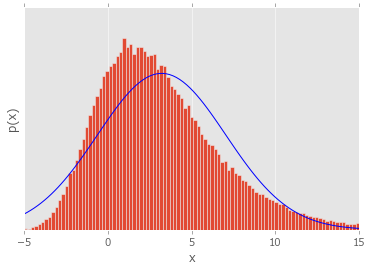

In [3]:
bins = np.linspace(-5, 15, 100)
X_n = sample(1)
plt.hist(X_n, bins)
show_gaussian_fit(X_n, bins)

# Label plot.
plt.xlabel('x')
plt.ylabel('p(x)')
plt.gca().axes.get_yaxis().set_ticks([])



But if we sum a few of these variables, the distribution starts to look Gaussian!


[]

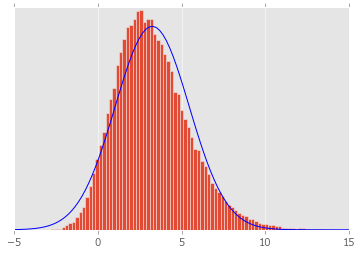

In [4]:
S_N = sample(3)
plt.hist(S_N, bins)
show_gaussian_fit(S_N, bins)
plt.gca().axes.get_yaxis().set_ticks([])


[]

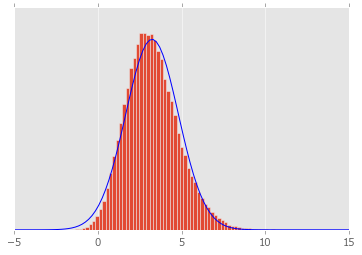

In [5]:
S_N = sample(6)
plt.hist(S_N, bins)
show_gaussian_fit(S_N, bins)
plt.gca().axes.get_yaxis().set_ticks([])


[]

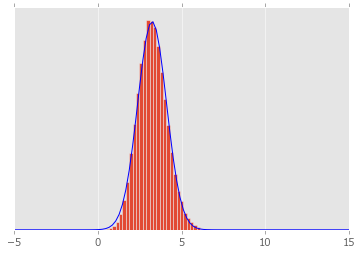

In [6]:
S_N = sample(20)
plt.hist(S_N, bins)
show_gaussian_fit(S_N, bins)
plt.gca().axes.get_yaxis().set_ticks([])



This looks extremely Gaussian!

The most amazing thing is that this works for any random variable $X_n$ as long as its variance is finite---it can be extremely non-Gaussian and it will still eventually look Gaussian!

The take-away message is this: If there is some summing or averaging of independent, identically distributed (iid) data in your measurement, that new variable will likely be well-described by a Gaussian model.



### References and further reading

More information about the CLT can be found on Wikipedia: http://en.wikipedia.org/wiki/Central_limit_theorem
